# Exercise for MSI lecture on machine learning --- an introduction
Author: Jia-Jie Zhu, with help from Sebastian Blaes  
Max Planck Institute for Intelligent Systems  


Based on the Python libraries Scikit-learn and Keras

# set-up

### Install anaconda

Follow the instruction at https://docs.anaconda.com/anaconda/install/
We will use python 3.X version.

### Create a new anaconda environment
```
conda create --name ml_syscop
```

### Launch Jupyter notebook

If it is not active yet, activate the environment (on windows, in the anaconda prompt)

    source activate ml_syscop

Navigate to the exercise folder

    cd /path/to/folder

Start the jupyter notebook (from the anaoconda prompt, inside the ML-workshop environment)

    jupyter notebook

A new browser window should open automatically

#### If you are not familiar with Python, I recommend ``from matlab to numpy'':
https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

#### Keras for DNN
This tutorial will also use the library Keras for deep neural nets. Install the package here: https://keras.io/#installation. Also, take a look at the simple quick tutorial therein.  
You may also need to install tensorflow following the same doc.  
Once you are done, do the following to import the library.

### Library imports

In [0]:
# numpy for matrix operation, backend is implemented in c
import numpy as np

# matplotlib for plotting, interface is inspired by matlab
import matplotlib.pyplot as plt

# for dnn
import keras

# Working with data

The dataset we want to look at is the diabetes dataset[1,2].

[1] http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

[2] http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [0]:
diabetes = np.loadtxt('diabetes.txt', skiprows=1)

In [0]:
diabetes_x = diabetes[:,:-1]
diabetes_y = diabetes[:,-1]
diabetes_feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
diabetes_target_names = ['disease_progression']

### Preprocessing

#### Normalization

In case that your dataset consists of features of very different kind it might easily happen that different channels cover quite different ranges.

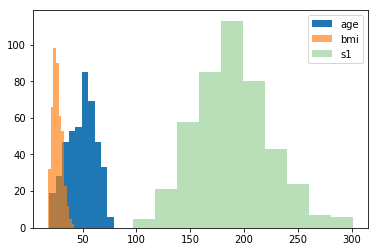

In [0]:
fig = plt.figure()
_ = plt.hist(diabetes_x[:,0], label='age')
_ = plt.hist(diabetes_x[:,2], alpha=0.66, label='bmi')
_ = plt.hist(diabetes_x[:,4], alpha=0.33, label='s1')
_ = plt.legend()

In order to weight the contribution of each feature equally, it is recommended to normalize each input channel by subtracting the mean and divide by the standard deviation over all training samples.

#### Exercise:

Fill in the blank fields. Normalize each feature channel to zero center and unit variance as well as normalize each feature channel such that the square sum equals one: 

In [0]:
diabetes_x_mean = 
diabetes_x_std = 
diabetes_x_norm = 

SyntaxError: invalid syntax (<ipython-input-5-d023198296dc>, line 1)

### solution

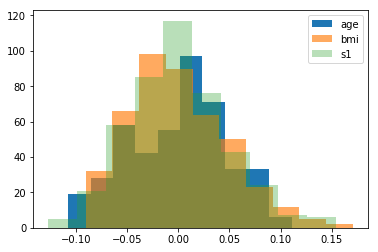

In [0]:
fig = plt.figure()
_ = plt.hist(diabetes_x_norm[:,0], label='age')
_ = plt.hist(diabetes_x_norm[:,2], alpha=0.66, label='bmi')
_ = plt.hist(diabetes_x_norm[:,4], alpha=0.33, label='s1')
_ = plt.legend()

Scikit learn provides convenient functions to do the job

In [0]:
from sklearn import preprocessing

In [0]:
diabetes_x_norm_easy = preprocessing.scale(diabetes_x, axis=0)
diabetes_x_norm_easy = preprocessing.normalize(diabetes_x_norm_easy, axis=0)

### Splitting your dataset in training, validation and test sets

Before you star to work with your dataset, split it into a training and test set and never touch the test set again until the very end of the training.

It is also good practice to store all your parameters in a dictionary that you can store and retrieve later.

In [0]:
len(diabetes_x)

442

In [0]:
config = {
    'trainN': 300, # number of training examples
    'valN': 100, # number of validation examples
    'testN': 42, # number of test examples
}

In [0]:
# Number of training + validation examples
trainValN = config['trainN'] + config['valN']

Before we split our dataset we should first shuffle is in case it is sorted

In [0]:
shuffled_indx = np.random.permutation(range(len(diabetes_x)))

In [0]:
diabetes_x_shuffled = diabetes_x_norm[shuffled_indx]
diabetes_y_shuffled = diabetes_y[shuffled_indx]

Split your data into training and test set

In [0]:
diabetes_x_train_ = diabetes_x_norm[:trainValN]
diabetes_y_train_ = diabetes_y[:trainValN]

diabetes_x_test  = diabetes_x_norm[trainValN:trainValN+config['testN']]
diabetes_y_test  = diabetes_y[trainValN:trainValN+config['testN']]

For model selection (different preprocessing, hyperparameter scan) split your training set again in a training and validation set that you can use freely during training   

In [0]:
diabetes_x_train = diabetes_x_train_[:config['trainN']]
diabetes_y_train = diabetes_y_train_[:config['trainN']]

diabetes_x_val = diabetes_x_train_[config['trainN']:config['trainN']+config['valN']]
diabetes_y_val = diabetes_y_train_[config['trainN']:config['trainN']+config['valN']]

# Ridge Regression and model selection

The first task we want to solve is linear regression. In linear regression, we are given *N* training samples of dimensionality *M* and usually a one dimensional corresponding real valued target variable. 

In [0]:
from sklearn import linear_model

In [0]:
def eval_lin_model(x, y, estimator):
    return np.mean((estimator.predict(x)-y)**2)

Lets start with least square regression by setting the regularization parameter *alpha* to zero. 

In [0]:
config['lsm_alpha'] = 0

In [0]:
estimator = linear_model.Ridge(alpha=config['lsm_alpha'])
estimator.fit(diabetes_x_train, diabetes_y_train)
lsm_coefs = estimator.coef_
lsm_train_error = eval_lin_model(diabetes_x_train, diabetes_y_train, estimator)
lsm_val_error = eval_lin_model(diabetes_x_val, diabetes_y_val, estimator)

Now, lets see how different values of *alpha* effect the model

In [0]:
alphas = np.logspace(-5,5,500)

#### **Exercise:** 
Fill in the blank fields:

In [0]:
ridge_coefs = []
ridge_train_errors = []
ridge_val_errors = []
for a in alphas:
    estimator = # Create a Ridge estimator object that takes a as input parameter
    # Fit the model to the data
    ridge_coefs.append() # extract the fitted coefficients from the model
    ridge_train_errors.append() # Append the training error of the current model
    ridge_val_errors.append() # Append the validation error of the current model
min_val_err_indx = np.argmin(ridge_val_errors)

#### solution

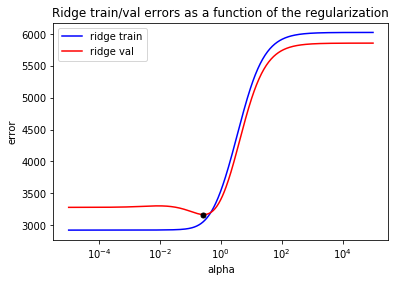

In [0]:
fig = plt.figure()
plt.plot(ridge_train_errors[:,0],ridge_train_errors[:,1], 'b', label='ridge train')
plt.plot(ridge_val_errors[:,0],ridge_val_errors[:,1], 'r', label='ridge val')
# plt.plot([alphas[0], alphas[-1]], [lsm_train_error]*2, 'b--', label='lsm train')
# plt.plot([alphas[0], alphas[-1]], [lsm_val_error]*2, 'r--', label='lsm val')
plt.plot(ridge_val_errors[min_val_err_indx, 0], ridge_val_errors[min_val_err_indx, 1], 'k.', markersize=10)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
_ = plt.title('Ridge train/val errors as a function of the regularization')

We see that the minimum validation error is achieved with regularization coeffcient of

In [0]:
# regularization coeff for min validation error
print('reg. coeff: ',ridge_val_errors[min_val_err_indx, 0])

reg. coeff:  0.2684464810961965


In [0]:
# check the minimal validation loss
print('min validation loss: ', ridge_val_errors[min_val_err_indx, 1])

min validation loss:  3167.0970390862144


### Let's visualize the test predictions of the trained model

#### Exercise:
Based on the analysis on different `alpha`s, let's use the best `alpha` we found to train the RR model

In [0]:
model_tuned = '''your code'''
model_tuned.fit('''your code''')

AttributeError: 'str' object has no attribute 'fit'

#### solution

Ridge(alpha=0.2684464810961965, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
rand_indx = np.random.choice(diabetes_x_test.shape[0], diabetes_x_test.shape[1], replace=False)
pred = model_tuned.predict(diabetes_x_test[rand_indx])

ground_truth = diabetes_y_test[rand_indx]

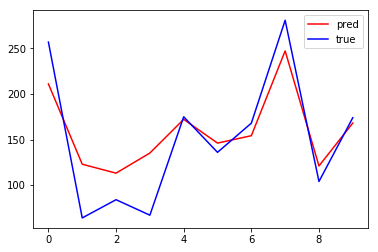

In [0]:
plt.figure()
plt.plot(pred,'r',label='pred')
plt.plot(ground_truth, 'b',label='true')
plt.legend()

Quantitatively, this model incurs a test loss of

In [0]:
score = eval_lin_model(diabetes_x_test, diabetes_y_test, model_tuned)
print('Test loss:', score)

Test loss: 1954.661954168828


### visualize the ridge regression coefficient

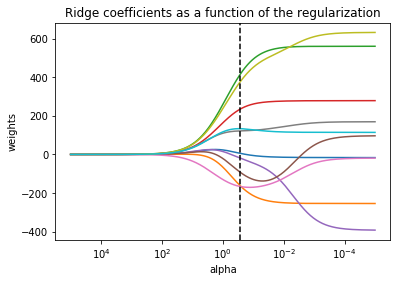

In [0]:
fig = plt.figure()
plt.plot(*zip(*ridge_coefs))
plt.axvline(ridge_val_errors[min_val_err_indx, 0], c='k', ls='--')
plt.xscale('log')
plt.xlim(plt.xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
_ = plt.axis('tight')

#### Exercise:
How do you explain the reason all curves above ``shrinks'' to 0?

#### Solution


Further reading: lasso[1], cross-validation[2], grid search[3]

[1] http://scikit-learn.org/stable/modules/linear_model.html#lasso

[2] http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

[3] http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

# Deep neural network (for regression)

## Dataset

In [0]:
x_train = diabetes_x_train
y_train = diabetes_y_train

x_test = diabetes_x_test
y_test = diabetes_y_test

x_val = diabetes_x_val
y_val = diabetes_y_val

## Preprocessing

Convert from *uint8* to float32 

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

300 train samples
42 test samples


## MLP network

A sequential model is a linear stack of operations.

In [0]:
model = keras.Sequential()

Add a fully connected layer with ReLU activation function, followed by a dropout layer with probability 0.2, followed by a second  fully connected layer with ReLU activation and another dropout layer. 

In [0]:
model.add(keras.layers.Dense(256, activation='relu', input_shape=(10,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))

Transform the output of the last layer into probabilities

In [0]:
model.add(keras.layers.Dense(1, activation=None))

Print a nice summary of the model

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2816      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 68,865
Trainable params: 68,865
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [0]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Train the model

#### Exercise:
We fit the model using the keras `model.fit()` function to the training data. Test a few different options for the ``epochs=`` argument: 10, 250, 1000. Which one is the best? Why?  
Be sure to use the validation data set we created above.
Use batch size of 10 here.
(Return the training history.)

In [0]:
history = model.fit('''your code''')

#### solution

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 300 samples, validate on 100 samples
Epoch 1/250
300/300 [==============================] - 0s 116us/step - loss: 27985.0929 - acc: 0.0000e+00 - val_loss: 31311.2330 - val_acc: 0.0000e+00
Epoch 2/250
300/300 [==============================] - 0s 159us/step - loss: 25267.7404 - acc: 0.0000e+00 - val_loss: 24918.2540 - val_acc: 0.0000e+00
Epoch 3/250
300/300 [==============================] - 0s 133us/step - loss: 15890.4863 - acc: 0.0000e+00 - val_loss: 10705.0036 - val_acc: 0.0000e+00
Epoch 4/250
300/300 [==============================] - 0s 138us/step - loss: 6291.5378 - acc: 0.0000e+00 - val_loss: 4182.1904 - val_acc: 0.0000e+00
Epoch 5/250
300/300 [==============================] - 0s 126us/step - loss: 4402.3172 - acc: 0.0033 - val_loss: 3802.0484 - val_acc: 0.0100
Epoch 6/250
300/300 [==============================] - 0s 140us/step - loss: 4072.4056 - acc: 0.0033 - val_loss: 3616.1641 - val_acc: 0.0000e+00
Epoch 7/250
300/300 [==============================] - 0s 104us/st

Evaluate the model

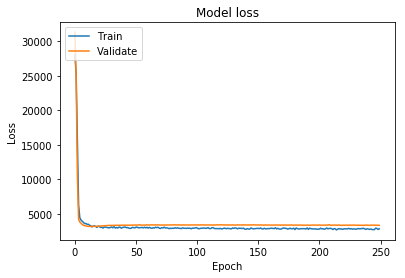

In [0]:
# visualize the training process

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

### Let's visualize the test predictions of our trained DNN model

In [0]:
rand_indx = np.random.choice(x_test.shape[0], x_test.shape[1], replace=False)
pred = model.predict(x_test[rand_indx])

ground_truth = y_test[rand_indx]

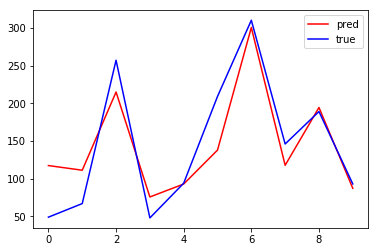

In [0]:
plt.figure()
plt.plot(pred,'r',label='pred')
plt.plot(ground_truth, 'b',label='true')
plt.legend()

The test loss of our DNN is

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])

Test loss: 1622.7285853794642


#### Exercise:
Compare this result with the ridge regression. Can you explain why one of the models is able to achieve smaller loss than the other? Which model class do you prefer?

#### Solution